In [1]:
import os
import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [2]:
parent = r'C:/Users/ricca/QTLab2324/IRdetection/Instruments/Test_data/data_20_02_set2'

In [3]:
def reader(parent):

    data = {
        "res1" : [],
        "res2" : [],
        "res3" : [],
        "res4" : []
    }

    for folder in os.listdir(parent):
        if folder.startswith("T"):
            T = folder.replace('T_','')
            for file in os.listdir(parent + '/' + folder):
                dic = {
                    'F' : [],
                    'I' : [],
                    'Q' : [],
                    'S21' : []
                }
                with h5py.File(parent + '/' + folder + '/' + file, 'r') as f:
                    dic['F'] = np.array(f['raw_data']['f'][:])
                    dic['I'] = np.array(f['raw_data']['i'][:])
                    dic['Q'] = np.array(f['raw_data']['q'][:])
                    dic['S21'] = np.sqrt(dic['I']**2 + dic['Q']**2)
                    if '1' in file:
                        data['res1'].append([T, dic])
                    elif '2' in file:
                        data['res2'].append([T, dic])
                    elif '3' in file:
                        data['res3'].append([T, dic])
                    elif '4' in file:
                        data['res4'].append([T, dic])
    
    return data 

In [4]:
data = reader(parent)

In [5]:
F, T, S21 = [], [], []
F_2, T_2, S21_2 = [], [], []
F_3, T_3, S21_3 = [], [], []
F_4, T_4, S21_4 = [], [], []
for i,datas in enumerate(data['res1']):
    T.append(int(datas[0]))
    S21.append(datas[1]['S21'])
    F.append(datas[1]['F'])
    
for i,datas in enumerate(data['res2']):
    T_2.append(int(datas[0]))
    S21_2.append(datas[1]['S21'])
    F_2.append(datas[1]['F'])
    
for i,datas in enumerate(data['res3']):
    T_3.append(int(datas[0]))
    S21_3.append(datas[1]['S21'])
    F_3.append(datas[1]['F'])
    
for i,datas in enumerate(data['res4']):
    T_4.append(int(datas[0]))
    S21_4.append(datas[1]['S21'])
    F_4.append(datas[1]['F'])

In [6]:
sorted_indices = sorted(range(len(T)), key=lambda k: T[k])
sorted_T   = [T[i] for i in sorted_indices]
sorted_S21 = [S21[i] for i in sorted_indices]
sorted_F   = [F[i]*1e-9 for i in sorted_indices]

sorted_S21_2 = [S21_2[i] for i in sorted_indices]
sorted_F_2   = [F_2[i]*1e-9 for i in sorted_indices]

sorted_S21_3 = [S21_3[i] for i in sorted_indices]
sorted_F_3   = [F_3[i]*1e-9 for i in sorted_indices]

sorted_S21_4 = [S21_4[i] for i in sorted_indices]
sorted_F_4   = [F_4[i]*1e-9 for i in sorted_indices]

Text(0.5, 1.0, 'Resonance 4')

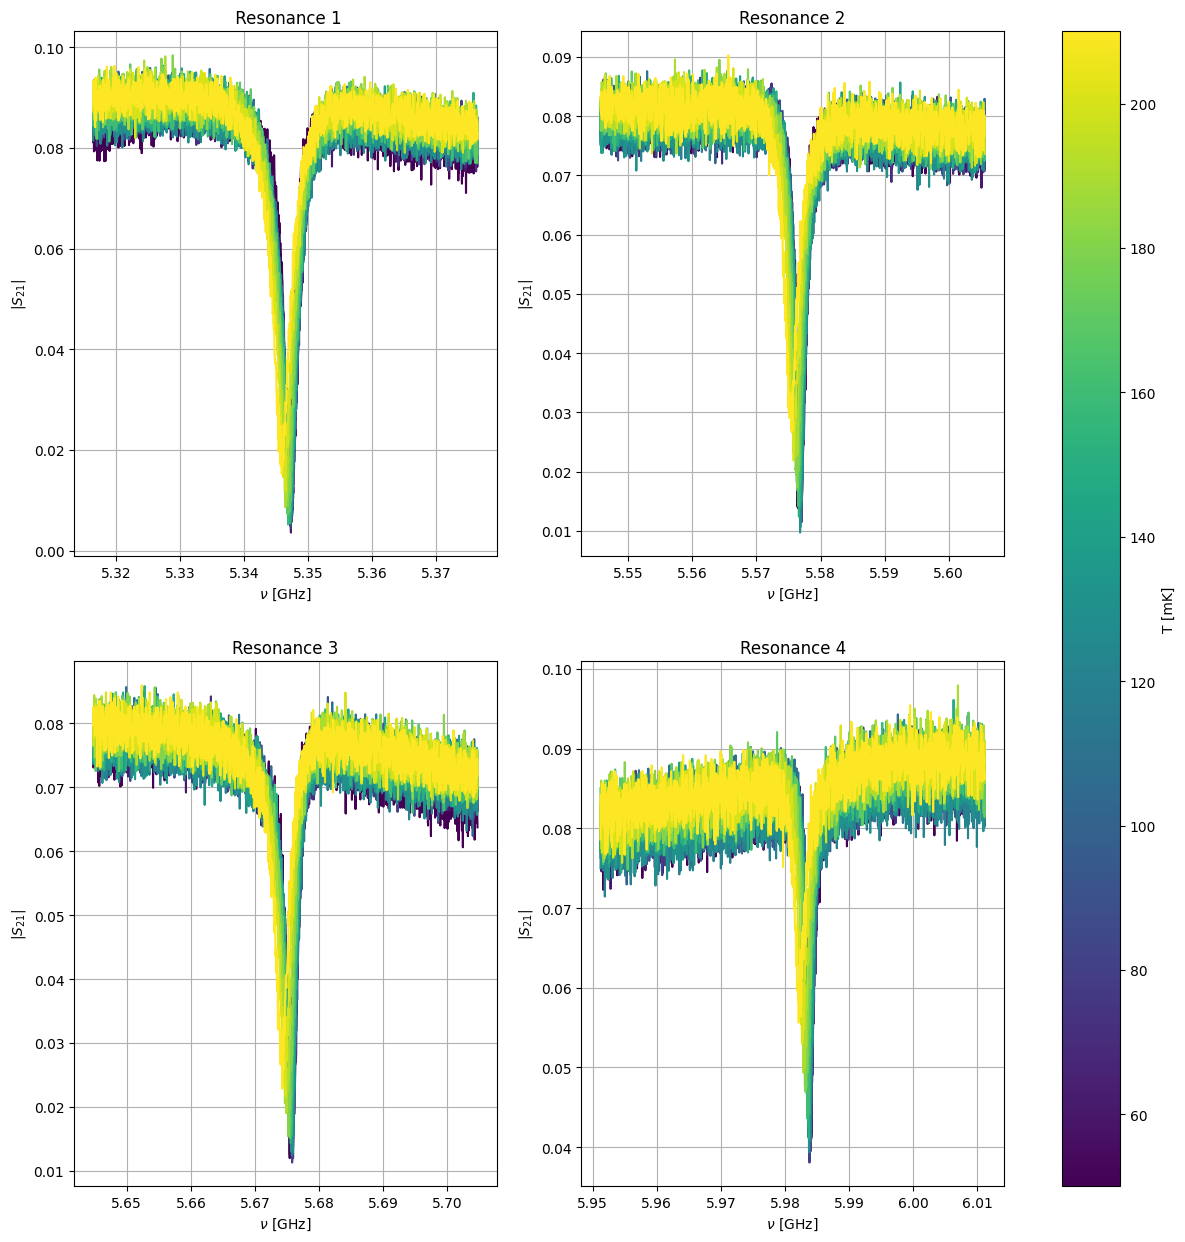

In [7]:
import matplotlib.cm as cm

# 4. Plot the data with a colormap
fig, axs = plt.subplots(2,2, figsize=(15,15))
norm = plt.Normalize(min(sorted_T), max(sorted_T))
cmap = cm.viridis

for i,datas in enumerate(data['res1']):
    color = cmap(norm(sorted_T[i]))
    axs[0][0].plot(sorted_F[i], sorted_S21[i], color=color, label=f'Temp {T[i]:.1f}')
    axs[0][1].plot(sorted_F_2[i], sorted_S21_2[i], color=color, label=f'Temp {T[i]:.1f}')
    axs[1][0].plot(sorted_F_3[i], sorted_S21_3[i], color=color, label=f'Temp {T[i]:.1f}')
    axs[1][1].plot(sorted_F_4[i], sorted_S21_4[i], color=color, label=f'Temp {T[i]:.1f}')
    
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=axs)
cbar.set_label('T [mK]')

# Add labels and title
fig.set_facecolor('white')
axs[0][0].grid()
axs[0][0].set_xlabel(r'$ \nu $ [GHz]')
axs[0][0].set_ylabel(r'$|S_{21}|$')
axs[0][0].set_title(r' Resonance 1')
axs[0][1].grid()
axs[0][1].set_xlabel(r'$ \nu $ [GHz]')
axs[0][1].set_ylabel(r'$|S_{21}|$')
axs[0][1].set_title(r'Resonance 2')
axs[1][0].grid()
axs[1][0].set_xlabel(r'$ \nu $ [GHz]')
axs[1][0].set_ylabel(r'$|S_{21}|$')
axs[1][0].set_title(r'Resonance 3')
axs[1][1].grid()
axs[1][1].set_xlabel(r'$ \nu $ [GHz]')
axs[1][1].set_ylabel(r'$|S_{21}|$')
axs[1][1].set_title(r'Resonance 4')